In [13]:
import torch
import torch.nn.functional as F
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

In [5]:
class TwoLayerNet(nn.Module):
    def __init__(self, D_in, H, D_out):
        super(TwoLayerNet, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    def forward(self, x):
        h_relu = F.relu(self.linear1(x))
        y_pred = self.linear2(h_relu)
        return y_pred

In [6]:
model = TwoLayerNet(2, 10, 1)
for name, param in model.named_parameters():
    print(name, param.size())

linear1.weight torch.Size([10, 2])
linear1.bias torch.Size([10])
linear2.weight torch.Size([1, 10])
linear2.bias torch.Size([1])


In [8]:
# clear grads of model
model.zero_grad()

In [12]:
np.random.seed(0)
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

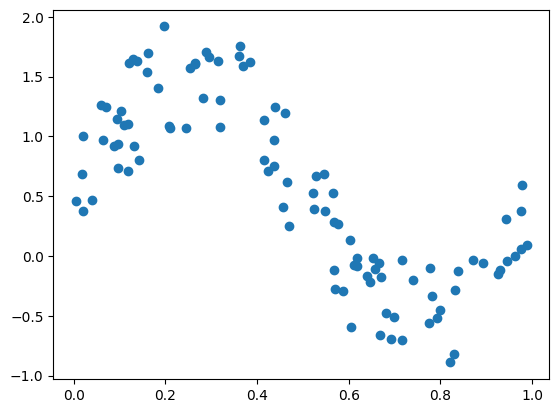

In [14]:
plt.plot(x, y, 'o')

In [15]:
lr = 0.2
iters = 10_000

In [20]:
model = TwoLayerNet(1, 10, 1)

In [21]:
x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

/var/folders/qv/crtt_9dd333bgv9ht3y35sdm0000gq/T/ipykernel_15365/2259165568.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, dtype=torch.float32)
/var/folders/qv/crtt_9dd333bgv9ht3y35sdm0000gq/T/ipykernel_15365/2259165568.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float32)


In [30]:
for i in range(iters):
    y_pred = model.forward(x)
    loss = nn.MSELoss()(y_pred, y)
    model.zero_grad()
    loss.backward()

    for p in model.parameters():
        p.data -= lr * p.grad

    if i % 1000 == 0:
        print(f'loss: {loss.item()}')

loss: 0.6449630856513977
loss: 0.21222931146621704
loss: 0.21287107467651367
loss: 0.21836204826831818
loss: 0.21797288954257965
loss: 0.21951261162757874
loss: 0.2195884883403778
loss: 0.21962767839431763
loss: 0.21987208724021912
loss: 0.2196003794670105


In [32]:
x = np.random.rand(100, 1)
y = np.sin(2 * np.pi * x) + np.random.rand(100, 1)

lr = 0.2
iters = 10_000

x = torch.tensor(x, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

model = TwoLayerNet(1, 10, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

for i in range(iters):
    optimizer.zero_grad()

    y_pred = model.forward(x)
    loss = nn.MSELoss()(y_pred, y)  

    loss.backward()

    optimizer.step()
    if i % 1000 == 0:
        print(f'loss: {loss.item()}')

loss: 1.3914711475372314
loss: 0.27124837040901184
loss: 0.2818193733692169
loss: 0.2730039358139038
loss: 0.27376362681388855
loss: 0.2744842767715454
loss: 0.27439430356025696
loss: 0.27500224113464355
loss: 0.2760799527168274
loss: 0.27590614557266235


In [39]:
def one_hot(state):
    height, width = 3, 4
    vec = np.zeros(height * width)
    y, x = state
    idx = width * y + x
    vec[idx] = 1
    vec_batch = vec[np.newaxis, :]
    return torch.tensor(vec_batch, dtype=torch.float32)

In [40]:
state = (2, 0)
x = one_hot(state)

print(x.shape)
x

torch.Size([1, 12])


tensor([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [44]:
class QNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(12, 100)
        self.l2 = nn.Linear(100, 4)

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = self.l2(x)
        return x

In [45]:
qnet = QNet()

state = (2, 0)
state = one_hot(state)

In [46]:
qs = qnet.forward(state)

In [47]:
qs

tensor([[-0.0048,  0.0714,  0.0779,  0.0258]], grad_fn=<AddmmBackward0>)

In [48]:
qs.shape

torch.Size([1, 4])